In [2]:
#Importing Libraries
import pandas as pd
from scipy import stats
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#For Model Evaluation
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import roc_auc_score,f1_score,recall_score,precision_score,plot_confusion_matrix,confusion_matrix,classification_report

#Classification Models
from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifie

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


ImportError: cannot import name 'RandomForestClassifie' from 'sklearn.ensemble' (C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [36]:
#Loading The Data
credit_risk_data = pd.read_excel("case_study_data.xlsx")

In [37]:
credit_risk_data.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,1
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,2
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,1
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,1
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,2


In [38]:
#Looking at features & Values
credit_risk_data.info()

#OBSERVATIONS:
    #No Null values
    #Data typeS are correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

# Problem Formulation
<p><b>Binary Classification</b></p>
<br>
-<i> To find the good or bad credit risk between 1 & 2</i>
<p> 
To solve the above we would be using data provided by   MAx Life Insurance
</p>

# Performance metrics
1. Log Loss
2. Accuracy
3. F1 Score
4. Precision
5. Recall
6. Confusion Matrix

In [39]:
credit_risk_data.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000,2.441000,2.155000,1.300000
std,18.055564,4234.100176,1.572016,1.570292,17.065664,0.697858,0.362086,0.458487
min,6.000000,375.000000,2.000000,2.000000,29.000000,2.000000,2.000000,1.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000,2.000000,2.000000,1.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000,2.000000,2.000000,1.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000,3.000000,2.000000,2.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000,6.000000,3.000000,2.000000


In [40]:
#Analysing the relationship b/w Features
credit_risk_data.corr().style.background_gradient(cmap =plt.cm.Blues).set_properties(**{'font-size': '11px'}) 

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status
duration,1.000000,0.625128,0.066263,0.024970,-0.037106,-0.026296,-0.024283,0.214668
amount,0.625128,1.000000,-0.272906,0.018909,0.032873,0.016287,0.017143,0.154739
inst_rate,0.066263,-0.272906,1.000000,0.047184,0.056342,0.007988,-0.066704,0.071108
residing_since,0.024970,0.018909,0.047184,1.000000,0.268296,0.102776,0.045624,-0.000139
age,-0.037106,0.032873,0.056342,0.268296,1.000000,0.164017,0.117814,-0.090807
num_credits,-0.026296,0.016287,0.007988,0.102776,0.164017,1.000000,0.117438,-0.044738
dependents,-0.024283,0.017143,-0.066704,0.045624,0.117814,0.117438,1.000000,-0.003015
status,0.214668,0.154739,0.071108,-0.000139,-0.090807,-0.044738,-0.003015,1.000000


In [41]:
#To take a look on data
for i in credit_risk_data.columns:
    print("\033[1m" +i+":"+"\033[0m")
    print()
    print(credit_risk_data[i].describe())
    print()
    print("Unique Values:")
    print(credit_risk_data[i].unique())
    print()
    print('='*50)
    print()

checkin_acc:

count     1000
unique       4
top        A14
freq       394
Name: checkin_acc, dtype: object

Unique Values:
['A11' 'A12' 'A14' 'A13']


duration:

count    1000.000000
mean       31.449000
std        18.055564
min         6.000000
25%        18.000000
50%        27.000000
75%        36.000000
max       108.000000
Name: duration, dtype: float64

Unique Values:
[  9  72  18  63  36  54  45  23  14  15  11  90  27  68  17  41  12  81
  30  21  50  32  24   6  71  20  33  59  42   8  39 108  60]


credit_history:

count     1000
unique       5
top        A32
freq       530
Name: credit_history, dtype: object

Unique Values:
['A34' 'A32' 'A33' 'A30' 'A31']


purpose:

count     1000
unique      10
top        A43
freq       280
Name: purpose, dtype: object

Unique Values:
['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']


amount:

count     1000.000000
mean      4907.134000
std       4234.100176
min        375.000000
25%       2048.250000
50%       3479.500000
75


## To Do List

1. checkin_acc: create dummy variable
2. duration: add feature 'amount/duration', add feature 'total payment with interest', installment ==> Assumption per year compounding 
3. credit_history: create dummy , num_credits, analysis
4. purpose: mean amount
5. amount: 
6. svaing_acc:create dummy variable
7. present_emp_since:create dummy variable
8. inst_rate: 
9. personal_status: create dummy variable
10. other_debtors: create dummy variable
11. residing_since: 
12. property: create dummy variable
13. age: bins
14. inst_plans: analysis, amount, int rate
15. housing: create dummy variable
16. num_credits: analysis, 
17. job: dummy, mean amount
18. dependents:  create feature 'amount/dependents'
19. telephone: create dummy variable
20. foreign_worker: create dummy variable
21. status: imbalance



C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


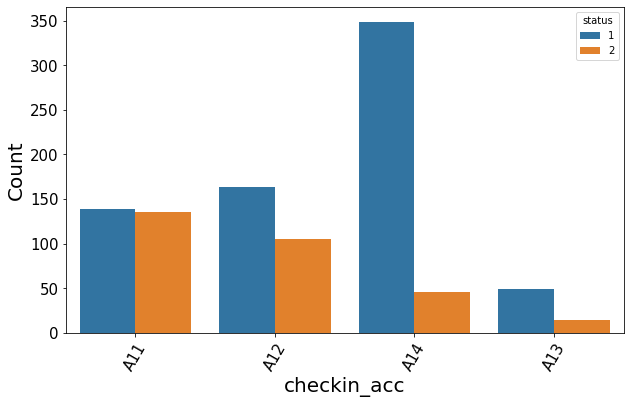

In [42]:
#Plotting the bar graph check the variation 
plt.figure(figsize=(10,6))
sns.countplot('checkin_acc',hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=60)
plt.yticks(size=15)
plt.xlabel('checkin_acc',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [43]:
value_count = pd.crosstab(credit_risk_data.checkin_acc,credit_risk_data.status,normalize='index')
Ratio_of_defaulters =  value_count[1]/value_count[2]
Ratio_of_defaulters = pd.DataFrame(Ratio_of_defaulters,columns = ['checkin_acc default ratio'])
Ratio_of_defaulters
#OBSERVATION
#Checking account A14 and A13 are showing very low risk of default while A11 is defaulting half the time

,checkin_acc default ratio
checkin_acc,
A11,1.029630
A12,1.561905
A13,3.500000
A14,7.565217


In [44]:
total_value_counts = credit_risk_data[['status']].value_counts()
given_default_ratio = total_value_counts[:1].values/total_value_counts[1:2].values
given_default_ratio



array([2.33333333])

In [45]:
#To create dummies
credit_risk_data = pd.get_dummies(credit_risk_data,columns = ['checkin_acc',"svaing_acc",
                                                              "present_emp_since",'personal_status',
                                                             "other_debtors","property",
                                                             "housing","telephone","foreign_worker"],drop_first=True)

In [46]:
#Duration

#assumption: converted durations in years by dividing it with 12

# Calculates compound interest when compounded annually
def compound_interest(principle, rate, time): 
    Amount = principle * (pow((1 + rate / 100), time/12))
    return Amount



#Create feature "Total_amount_with_int" as it gives info on how much value one has to pay including interest
credit_risk_data['Total_amount_with_int'] = credit_risk_data[['amount',"inst_rate",
                                     "duration"]].apply(lambda x: compound_interest(x.amount,x.inst_rate,x.duration),axis=1)


#Create feature "Total_Int" as it gives the idea about how much interest bank is getting from the following person
credit_risk_data['Total_Int'] = credit_risk_data['Total_amount_with_int'] - credit_risk_data['amount']


#Create feature "avg_amount_per_month", it shows the amount one has to pay as installment every month.
credit_risk_data['avg_amount_per_month'] = credit_risk_data['Total_amount_with_int']/credit_risk_data['duration']

In [47]:
credit_risk_data

,duration,credit_history,purpose,amount,inst_rate,residing_since,age,inst_plans,num_credits,job,...,property_A122,property_A123,property_A124,housing_A152,housing_A153,telephone_A192,foreign_worker_A202,Total_amount_with_int,Total_Int,avg_amount_per_month
0,9,A34,A43,1754,6,6,101,A143,3,A173,...,0,0,0,1,0,1,0,1832.352344,78.352344,203.594705
1,72,A32,A43,8927,3,3,33,A143,2,A173,...,0,0,0,1,0,0,0,10659.304851,1732.304851,148.045901
2,18,A34,A46,3144,3,5,74,A143,2,A172,...,0,0,0,1,0,0,0,3286.535853,142.535853,182.585325
3,63,A32,A42,11823,3,6,68,A143,2,A173,...,1,0,0,0,1,0,0,13807.756489,1984.756489,219.170738
4,36,A33,A40,7305,5,6,80,A143,3,A173,...,0,0,1,0,1,0,0,8456.450625,1151.450625,234.901406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,A32,A42,2604,5,6,47,A143,2,A172,...,0,0,0,1,0,0,0,2801.721278,197.721278,155.651182
996,45,A32,A41,5786,6,6,60,A143,2,A174,...,1,0,0,1,0,1,0,7199.053881,1413.053881,159.978975
997,18,A32,A43,1206,6,6,57,A143,2,A173,...,0,1,0,1,0,0,0,1316.152175,110.152175,73.119565
998,68,A32,A43,2768,6,6,35,A143,2,A173,...,0,0,1,0,1,1,0,3850.933233,1082.933233,56.631371


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


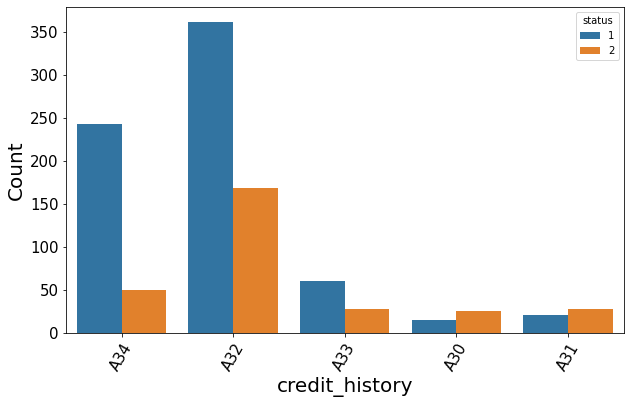

In [48]:
#credit_history vs default rate
#Plotting the bar graph check the variation 
plt.figure(figsize=(10,6))
sns.countplot('credit_history',hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=60)
plt.yticks(size=15)
plt.xlabel('credit_history',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()


#OBSERVATIONS:
#Credit history A30, A31 shows very high probability of default
#credit history of A34 shows the least probability of default.

In [49]:
value_count = pd.crosstab(credit_risk_data.credit_history,credit_risk_data.status,normalize='index')
Ratio_of_defaulters =  value_count[1]/value_count[2]
Ratio_of_defaulters = pd.DataFrame(Ratio_of_defaulters,columns = ['credit_history default ratio'])
Ratio_of_defaulters

,credit_history default ratio
credit_history,
A30,0.600000
A31,0.750000
A32,2.136095
A33,2.142857
A34,4.860000


In [50]:
#Create dummies for credit_history

credit_risk_data = pd.get_dummies(credit_risk_data, columns=['credit_history'],drop_first=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


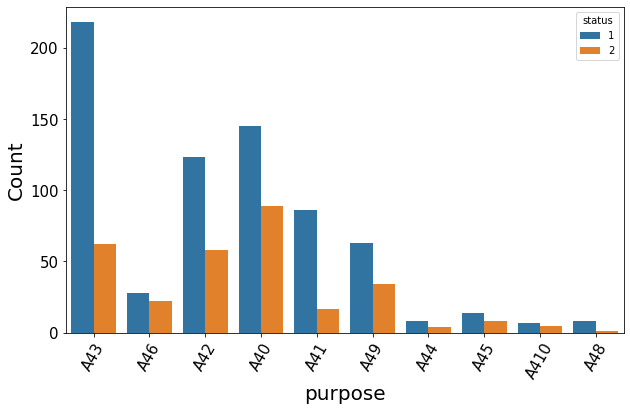

In [51]:
#purpose vs default status

#Plotting the bar graph check the variation 
plt.figure(figsize=(10,6))
sns.countplot('purpose',hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=60)
plt.yticks(size=15)
plt.xlabel('purpose',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [52]:
pd.crosstab(credit_risk_data.purpose,credit_risk_data.status,normalize='index')


#OBSERVATIONS:
#For purpose A41, A48, A43 the default risk is the least
#For purpose A410, A46, A40 the default risk is maximum

status,1,2
purpose,,
A40,0.619658,0.380342
A41,0.834951,0.165049
A410,0.583333,0.416667
A42,0.679558,0.320442
A43,0.778571,0.221429
A44,0.666667,0.333333
A45,0.636364,0.363636
A46,0.560000,0.440000
A48,0.888889,0.111111


In [53]:
value_count = pd.crosstab(credit_risk_data.purpose,credit_risk_data.status,normalize='index')
Ratio_of_defaulters =  value_count[1]/value_count[2]
Ratio_of_defaulters = pd.DataFrame(Ratio_of_defaulters,columns = ['purpose default ratio'])
Ratio_of_defaulters

,purpose default ratio
purpose,
A40,1.629213
A41,5.058824
A410,1.400000
A42,2.120690
A43,3.516129
A44,2.000000
A45,1.750000
A46,1.272727
A48,8.000000


In [54]:
#To calculate the deviation of individual total amount with interest from the mean total amount with interest when grouped by purpose

mean_Total_amount_with_int_per_purpose = credit_risk_data[["Total_amount_with_int",'purpose']].groupby(['purpose']).mean()


mean_Total_amount_with_int_per_purpose.rename(columns = {'Total_amount_with_int':'mean_Total_amount_with_int_per_purpose'},inplace=True)


credit_risk_data['Total_amount_with_int_deviation_from_mean'] = credit_risk_data['Total_amount_with_int'] - credit_risk_data.merge(mean_Total_amount_with_int_per_purpose,left_on ="purpose",
            right_on=mean_Total_amount_with_int_per_purpose.index, how='left' )['mean_Total_amount_with_int_per_purpose']

In [55]:
#Create dummies for 'purpose'

credit_risk_data = pd.get_dummies(credit_risk_data, columns=['purpose'],drop_first=True)

In [56]:
credit_risk_data

,duration,amount,inst_rate,residing_since,age,inst_plans,num_credits,job,dependents,status,...,Total_amount_with_int_deviation_from_mean,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49
0,9,1754,6,6,101,A143,3,A173,2,1,...,-2523.628870,0,0,0,1,0,0,0,0,0
1,72,8927,3,3,33,A143,2,A173,2,2,...,6303.323638,0,0,0,1,0,0,0,0,0
2,18,3144,3,5,74,A143,2,A172,3,1,...,-2326.344623,0,0,0,0,0,0,1,0,0
3,63,11823,3,6,68,A143,2,A173,3,1,...,8580.307116,0,0,1,0,0,0,0,0,0
4,36,7305,5,6,80,A143,3,A173,3,2,...,3211.994712,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,2604,5,6,47,A143,2,A172,2,1,...,-2425.728094,0,0,1,0,0,0,0,0,0
996,45,5786,6,6,60,A143,2,A174,2,1,...,-2177.096783,1,0,0,0,0,0,0,0,0
997,18,1206,6,6,57,A143,2,A173,2,1,...,-3039.829039,0,0,0,1,0,0,0,0,0
998,68,2768,6,6,35,A143,2,A173,2,2,...,-505.047981,0,0,0,1,0,0,0,0,0


## inst_rate

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


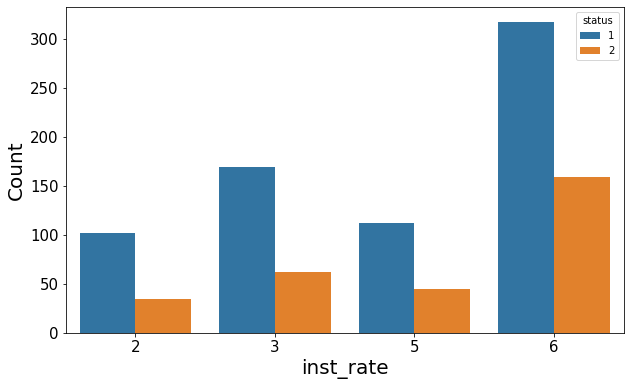

In [57]:
#installment rate as % of disposable income vs default status
#Plotting the bar graph check the variation 
plt.figure(figsize=(10,6))
sns.countplot('inst_rate',hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('inst_rate',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [58]:
pd.crosstab(credit_risk_data.inst_rate,credit_risk_data.status,normalize='index')

#OBSERVATIONS:
#With higher inst_rate the risk of default increases.

status,1,2
inst_rate,,
2,0.750000,0.250000
3,0.731602,0.268398
5,0.713376,0.286624
6,0.665966,0.334034


## inst_plans

In [59]:
credit_risk_data["inst_plans"]

0      A143
1      A143
2      A143
3      A143
4      A143
       ... 
995    A143
996    A143
997    A143
998    A143
999    A143
Name: inst_plans, Length: 1000, dtype: object

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


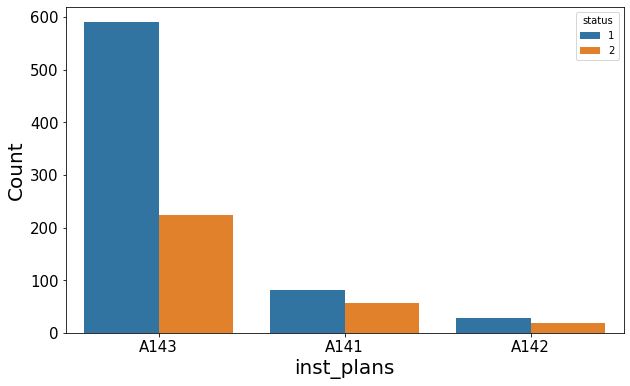

In [60]:
#Installment plans vs default status
#Plotting the bar graph check the variation 

plt.figure(figsize=(10,6))
sns.countplot('inst_plans',hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('inst_plans',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [61]:
mean_Total_Int_per_plan = credit_risk_data[["Total_Int","inst_plans"]].groupby(['inst_plans']).mean()
mean_Total_Int_per_plan

,Total_Int
inst_plans,
A141,843.302230
A142,1105.121912
A143,754.687709


In [62]:
pd.crosstab(credit_risk_data.inst_plans,credit_risk_data.status,normalize='index')

#OBSERVATIONS:
# A143 has the least risk in default but gains the least interest income while if we compare plan A141 and A142 we find that plan 142 earns higher interest and still the default risk is better compared to A141.  

status,1,2
inst_plans,,
A141,0.589928,0.410072
A142,0.595745,0.404255
A143,0.724816,0.275184


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


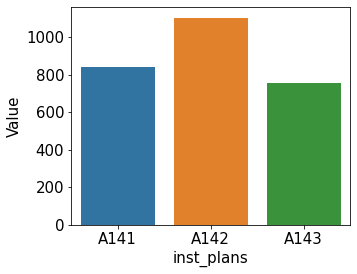

In [63]:
# Mean total interest earned for different installment plans

plt.figure(figsize=(5,4))
sns.barplot(mean_Total_Int_per_plan.index,mean_Total_Int_per_plan['Total_Int'])
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('inst_plans',fontsize=15)
plt.ylabel('Value',fontsize=15)
plt.show()

In [65]:
value_count = pd.crosstab(credit_risk_data.inst_plans,credit_risk_data.status,normalize='index')
Ratio_of_defaulters =  value_count[1]/value_count[2]
Ratio_of_defaulters = pd.DataFrame(Ratio_of_defaulters,columns = ['inst_plans default ratio'])
Ratio_of_defaulters

,inst_plans default ratio
inst_plans,
A141,1.438596
A142,1.473684
A143,2.633929


In [66]:
#Create dummies for inst_plans

credit_risk_data = pd.get_dummies(credit_risk_data, columns=['inst_plans'],drop_first=True)

## num_credits

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


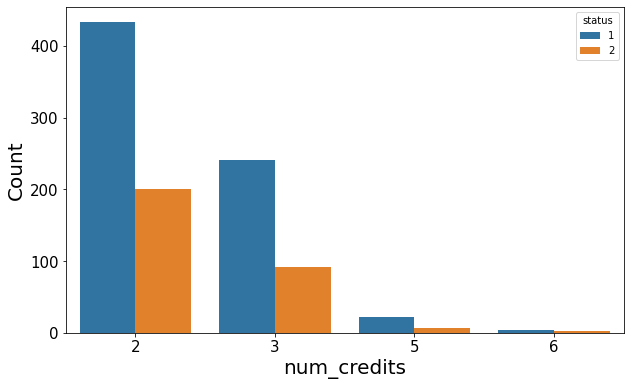

In [67]:
#Number of previous credits vs default status
#Plotting the bar graph check the variation 

plt.figure(figsize=(10,6))
sns.countplot('num_credits',hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('num_credits',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [68]:
pd.crosstab(credit_risk_data.num_credits,credit_risk_data.status,normalize='index')


status,1,2
num_credits,,
2,0.684044,0.315956
3,0.723724,0.276276
5,0.785714,0.214286
6,0.666667,0.333333


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


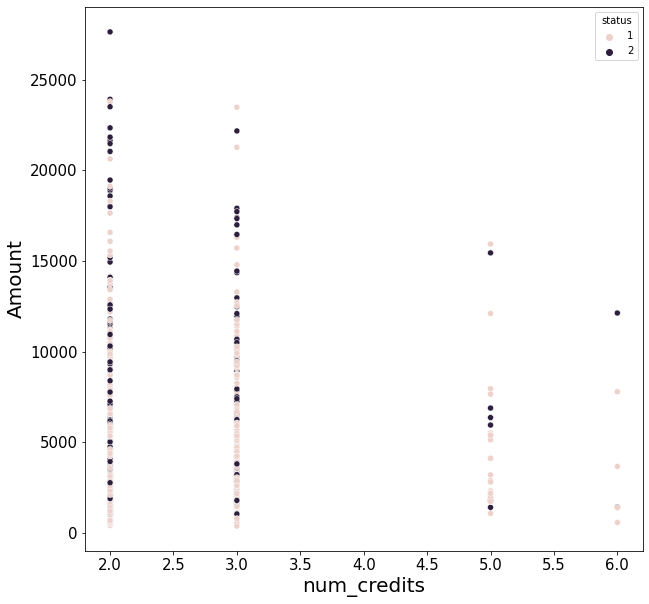

In [69]:
#Num_credits and amount borrowed with default status
#Plotting the bar graph check the variation 
plt.figure(figsize=(10,10))
sns.scatterplot('num_credits',"amount",hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('num_credits',fontsize=20)
plt.ylabel('Amount',fontsize=20)
plt.show()

## Job

In [70]:
#Adding feature 'mean_amount_per_job' which shows the mean of ammount grouped by job

mean_amount_per_job = credit_risk_data[["amount",'job']].groupby(['job']).mean()
mean_amount_per_job.rename(columns = {'amount':'mean_amount_per_job'},inplace=True)
credit_risk_data.merge(mean_amount_per_job,left_on ="job",
                       right_on=mean_amount_per_job.index, 
                       how='left')

,duration,amount,inst_rate,residing_since,age,num_credits,job,dependents,status,checkin_acc_A12,...,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,inst_plans_A142,inst_plans_A143,mean_amount_per_job
0,9,1754,6,6,101,3,A173,2,1,0,...,0,1,0,0,0,0,0,0,1,4606.704762
1,72,8927,3,3,33,2,A173,2,2,1,...,0,1,0,0,0,0,0,0,1,4606.704762
2,18,3144,3,5,74,2,A172,3,1,0,...,0,0,0,0,1,0,0,0,1,3538.005000
3,63,11823,3,6,68,2,A173,3,1,0,...,1,0,0,0,0,0,0,0,1,4606.704762
4,36,7305,5,6,80,3,A173,3,2,0,...,0,0,0,0,0,0,0,0,1,4606.704762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,2604,5,6,47,2,A172,2,1,0,...,1,0,0,0,0,0,0,0,1,3538.005000
996,45,5786,6,6,60,2,A174,2,1,0,...,0,0,0,0,0,0,0,0,1,8153.479730
997,18,1206,6,6,57,2,A173,2,1,0,...,0,1,0,0,0,0,0,0,1,4606.704762
998,68,2768,6,6,35,2,A173,2,2,0,...,0,1,0,0,0,0,0,0,1,4606.704762


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


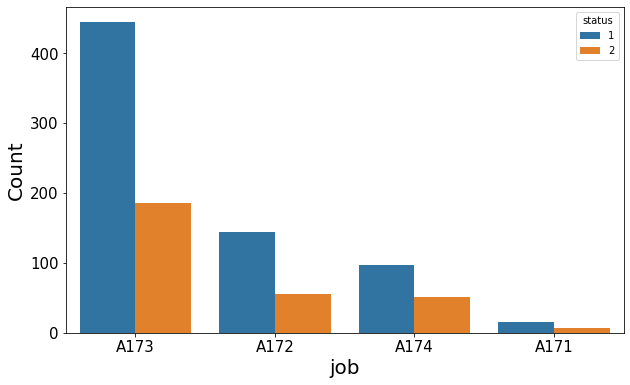

In [71]:
# Job vs default status
#Plotting the bar graph check the variation 

plt.figure(figsize=(10,6))
sns.countplot('job',hue='status',data=credit_risk_data)
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('job',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

In [74]:
pd.crosstab(credit_risk_data.job,credit_risk_data.status,normalize='index')

#OBSERVATION:
#Person having Job A173 has the least default risk while person with job A174 has highest risk of default.

status,1,2
job,,
A171,0.681818,0.318182
A172,0.720000,0.280000
A173,0.704762,0.295238
A174,0.655405,0.344595


In [75]:
value_count = pd.crosstab(credit_risk_data.job,credit_risk_data.status,normalize='index')
Ratio_of_defaulters =  value_count[1]/value_count[2]
Ratio_of_defaulters = pd.DataFrame(Ratio_of_defaulters,columns = ['job default ratio'])
Ratio_of_defaulters

,job default ratio
job,
A171,2.142857
A172,2.571429
A173,2.387097
A174,1.901961


In [49]:
#Creating dummies for job

credit_risk_data = pd.get_dummies(credit_risk_data, columns=['job'],drop_first=True)

## dependents

In [50]:
#Creating a feature 'intlmnt_per_depndnt' which shows how much a person pays as installment(in a month) per dependent he is having. This shows the burden one has per dependent.
#Formula: (total amount with interest)/(duration*dependents)


credit_risk_data['intlmnt_per_depndnt'] = credit_risk_data['Total_amount_with_int']/(credit_risk_data['dependents']*credit_risk_data['duration'])


In [51]:
credit_risk_data

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,status,checkin_acc_A12,checkin_acc_A13,...,purpose_A45,purpose_A46,purpose_A48,purpose_A49,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174,intlmnt_per_depndnt
0,9,1754,6,6,101,3,2,1,0,0,...,0,0,0,0,0,1,0,1,0,101.797352
1,72,8927,3,3,33,2,2,2,1,0,...,0,0,0,0,0,1,0,1,0,74.022950
2,18,3144,3,5,74,2,3,1,0,0,...,0,1,0,0,0,1,1,0,0,60.861775
3,63,11823,3,6,68,2,3,1,0,0,...,0,0,0,0,0,1,0,1,0,73.056913
4,36,7305,5,6,80,3,3,2,0,0,...,0,0,0,0,0,1,0,1,0,78.300469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,2604,5,6,47,2,2,1,0,0,...,0,0,0,0,0,1,1,0,0,77.825591
996,45,5786,6,6,60,2,2,1,0,0,...,0,0,0,0,0,1,0,0,1,79.989488
997,18,1206,6,6,57,2,2,1,0,0,...,0,0,0,0,0,1,0,1,0,36.559783
998,68,2768,6,6,35,2,2,2,0,0,...,0,0,0,0,0,1,0,1,0,28.315686


In [52]:
credit_risk_data.info()

#Dummies created for all object data type features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   duration                                   1000 non-null   int64  
 1   amount                                     1000 non-null   int64  
 2   inst_rate                                  1000 non-null   int64  
 3   residing_since                             1000 non-null   int64  
 4   age                                        1000 non-null   int64  
 5   num_credits                                1000 non-null   int64  
 6   dependents                                 1000 non-null   int64  
 7   status                                     1000 non-null   int64  
 8   checkin_acc_A12                            1000 non-null   uint8  
 9   checkin_acc_A13                            1000 non-null   uint8  
 10  checkin_acc_A14          

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


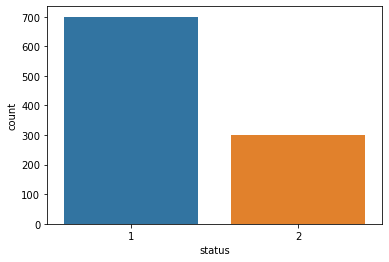

In [53]:
#Checking for imbalance 
sns.countplot(credit_risk_data['status'])
plt.show()

#OBSERVATION:
#In the dataset we have 70% of status=1 and 30% of status=2

In [54]:
#To_Evalute_the_Model
def classification_model_evaluation(model,x_train,y_train,x_test,y_test):
    print("####################### model Evalution started #######################")
    train_pre = model.predict(x_train)
    test_pre = model.predict(x_test)
    train_pro = model.predict_proba(x_train)
    test_pro = model.predict_proba(x_test)

    print("Train Accuracy: {0} \t Test Accuracy: {1}".format(accuracy_score(y_train, train_pre),accuracy_score(y_test,test_pre)))
    print("Train Log Loss: {0} \t Test Log Loss: {1}".format(log_loss(y_train, train_pro),log_loss(y_test,test_pro)))
    print("Train F1: {0} \t\t Test F1: {1}".format(f1_score(y_train, train_pre,average='weighted'),f1_score(y_test,test_pre,average='weighted')))
    print("Train recall: {0} \t Test recall: {1}".format(recall_score(y_train, train_pre,average='weighted'),recall_score(y_test,test_pre,average='weighted')))
    print("Train precision: {0} \t Test Precision: {1}".format(precision_score(y_train, train_pre,average='weighted'),precision_score(y_test,test_pre,average='weighted')))
    print()
    print("Train Classification report: \n{0} \n Test classification report: \n{1}".format(classification_report(y_train, train_pre),classification_report(y_test,test_pre)))
    
    
    print()
    print()
    print()
    print("="*25,"Train Set","="*25)
    print()
    titles_options = [("Train set Confusion matrix, without normalization", None),
                  ("Train set Normalized confusion matrix by all", 'all'),
                  ("Train set Normalized confusion matrix by pred(Columns)", 'pred'),
                  ("Train set Normalized confusion matrix by true(Rows)", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, x_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()
    
    print()
    print()
    print()
    print("="*25,"Test Set","="*30)
    print()
    titles_options = [("Test Set Confusion matrix, without normalization", None),
                  ("Test Set Normalized confusion matrix by all", 'all'),
                  ("Test Set Normalized confusion matrix by pred(Columns)", 'pred'),
                  ("Test Set Normalized confusion matrix by true(Rows)", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)

    plt.show()


In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [56]:
#Scaling the features
cols = list(credit_risk_data.columns)
cols.remove('status')

scaler = StandardScaler() 
scaler.fit(credit_risk_data.drop(columns=['status']))
Scaled_data = scaler.transform(credit_risk_data.drop(columns=['status']))
Scaled_data = pd.DataFrame(Scaled_data,columns=cols)

#Dividing into train(80%) and test data(20%)
x_train,x_test,y_train,y_test = train_test_split(Scaled_data,credit_risk_data["status"], test_size = 0.2,random_state=1)

In [57]:
#Dividing into train(80%) and test data(20%)
x_train,x_test,y_train,y_test = train_test_split(Scaled_data,credit_risk_data["status"], test_size = 0.2,random_state=1)

####################### model Evalution started #######################
Train Accuracy: 0.7625 	 Test Accuracy: 0.73
Train Log Loss: 0.472905063994225 	 Test Log Loss: 0.5511141290724555
Train F1: 0.7698877105212383 		 Test F1: 0.7372659430122117
Train recall: 0.7625 	 Test recall: 0.73
Train precision: 0.7902000490918017 	 Test Precision: 0.7515791176787833

Train Classification report: 
              precision    recall  f1-score   support

           1       0.88      0.76      0.82       559
           2       0.58      0.76      0.66       241

    accuracy                           0.76       800
   macro avg       0.73      0.76      0.74       800
weighted avg       0.79      0.76      0.77       800
 
 Test classification report: 
              precision    recall  f1-score   support

           1       0.84      0.76      0.80       141
           2       0.53      0.66      0.59        59

    accuracy                           0.73       200
   macro avg       0.69      0.7

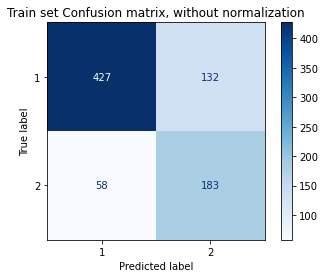

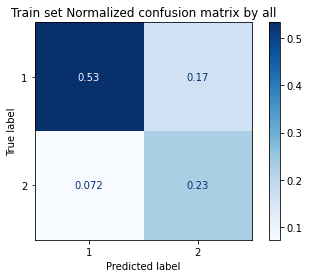

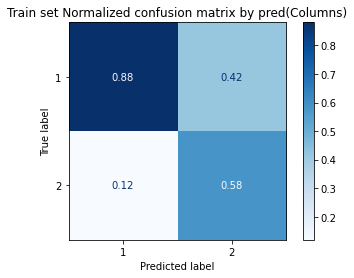

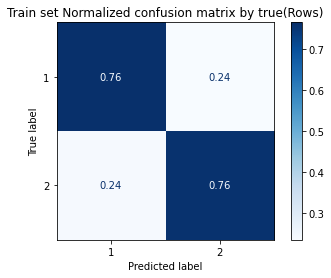




========================= Test Set ==============================



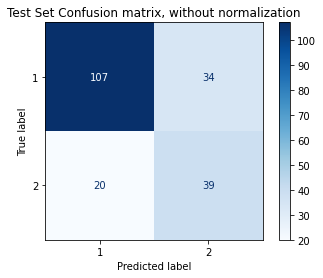

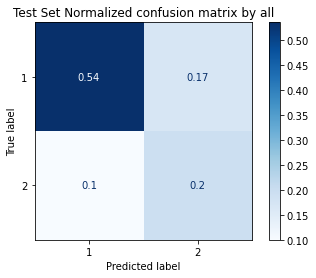

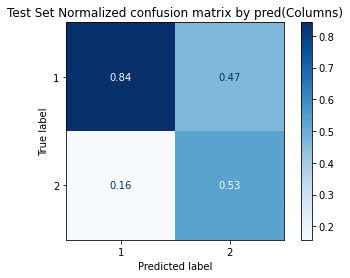

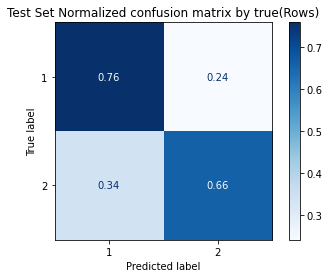

None


In [58]:
#lOGISTIC REGRESSION

LR_Model = LogisticRegression(C=1, class_weight={1:1,2:2},max_iter=950)
LR_Model.fit(x_train,y_train)
print(classification_model_evaluation(LR_Model,x_train,y_train,x_test,y_test))

####################### model Evalution started #######################
Train Accuracy: 0.84625 	 Test Accuracy: 0.755
Train Log Loss: 0.44287084329841664 	 Test Log Loss: 0.5343629748441688
Train F1: 0.833399589076989 		 Test F1: 0.7293577296489918
Train recall: 0.84625 	 Test recall: 0.755
Train precision: 0.8546546803652969 	 Test Precision: 0.7391294642857144

Train Classification report: 
              precision    recall  f1-score   support

           1       0.83      0.97      0.90       559
           2       0.90      0.55      0.68       241

    accuracy                           0.85       800
   macro avg       0.87      0.76      0.79       800
weighted avg       0.85      0.85      0.83       800
 
 Test classification report: 
              precision    recall  f1-score   support

           1       0.77      0.92      0.84       141
           2       0.66      0.36      0.46        59

    accuracy                           0.76       200
   macro avg       0.72    

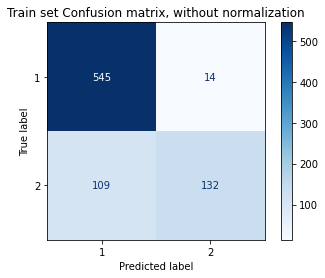

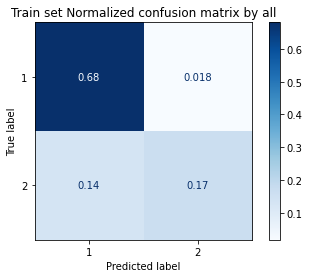

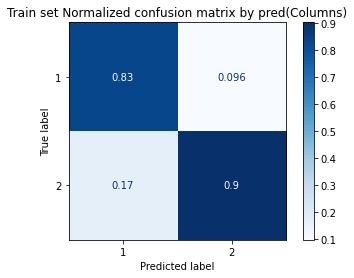

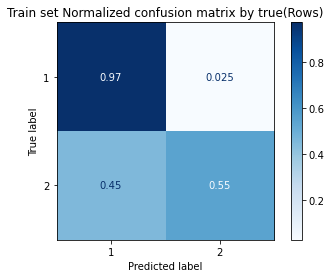




========================= Test Set ==============================



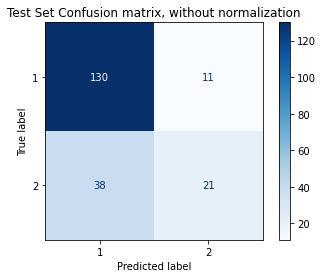

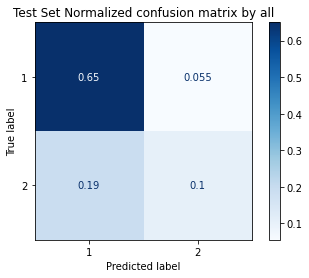

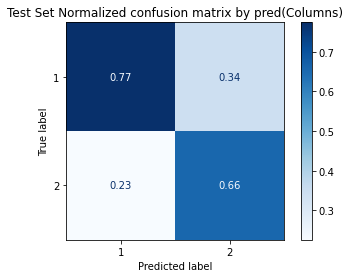

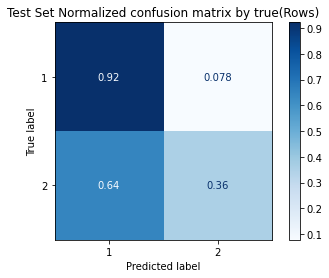

None


In [71]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier(n_estimators=300,
                                  max_depth=5, 
                                  class_weight={1:1,2:1.4})
RF_Model.fit(x_train,y_train)
print(classification_model_evaluation(RF_Model,x_train,y_train,x_test,y_test))

In [60]:

#Dividing into train(80%) and test data(20%)
x_train,x_test,y_train,y_test = train_test_split(Scaled_data,credit_risk_data["status"], test_size = 0.2,random_state=1)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

####################### model Evalution started #######################
Train Accuracy: 0.82 	 Test Accuracy: 0.77
Train Log Loss: 0.46349904142408677 	 Test Log Loss: 0.5323728164940833
Train F1: 0.8103775936652247 		 Test F1: 0.7562000000000001
Train recall: 0.82 	 Test recall: 0.77
Train precision: 0.8156994957177495 	 Test Precision: 0.7573815002300966

Train Classification report: 
              precision    recall  f1-score   support

           1       0.83      0.93      0.88       559
           2       0.78      0.56      0.65       241

    accuracy                           0.82       800
   macro avg       0.81      0.75      0.77       800
weighted avg       0.82      0.82      0.81       800
 
 Test classification report: 
              precision    recall  f1-score   support

           1       0.80      0.90      0.85       141
           2       0.66      0.46      0.54        59

    accuracy                           0.77       200
   macro avg       0.73      0.68 

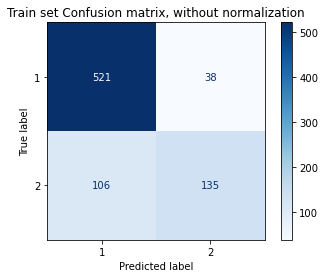

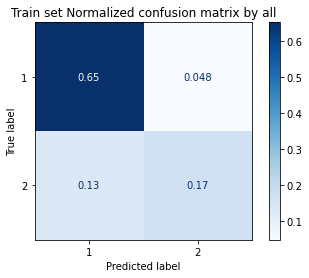

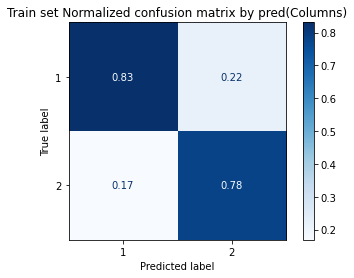

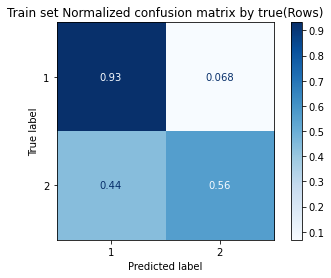




========================= Test Set ==============================



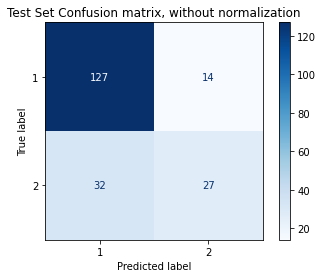

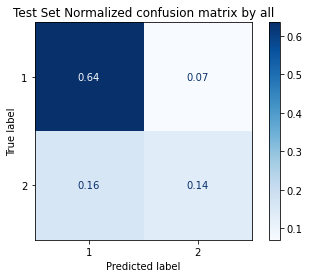

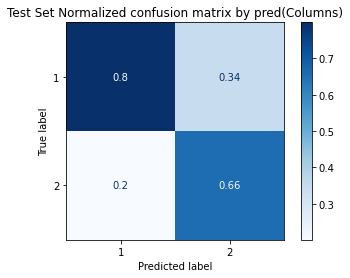

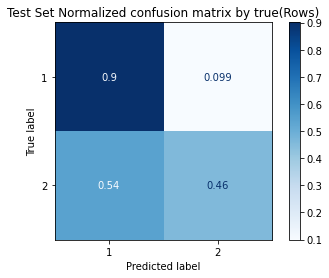

None


In [61]:
# CATBOOST

catboost_model = CatBoostClassifier(iterations=10000,
                                    early_stopping_rounds=10,                                
                                    loss_function = "Logloss",
                                    verbose=False,
                                    learning_rate=0.01,
                                    depth=5,
                                    class_weights={1:1,2:1.3})
catboost_model.fit(x_train, 
                   y_train,
                   eval_set=(x_test, y_test),
                   use_best_model=True,
                   verbose=False,plot=True)

print(classification_model_evaluation(catboost_model,x_train,y_train,x_test,y_test))

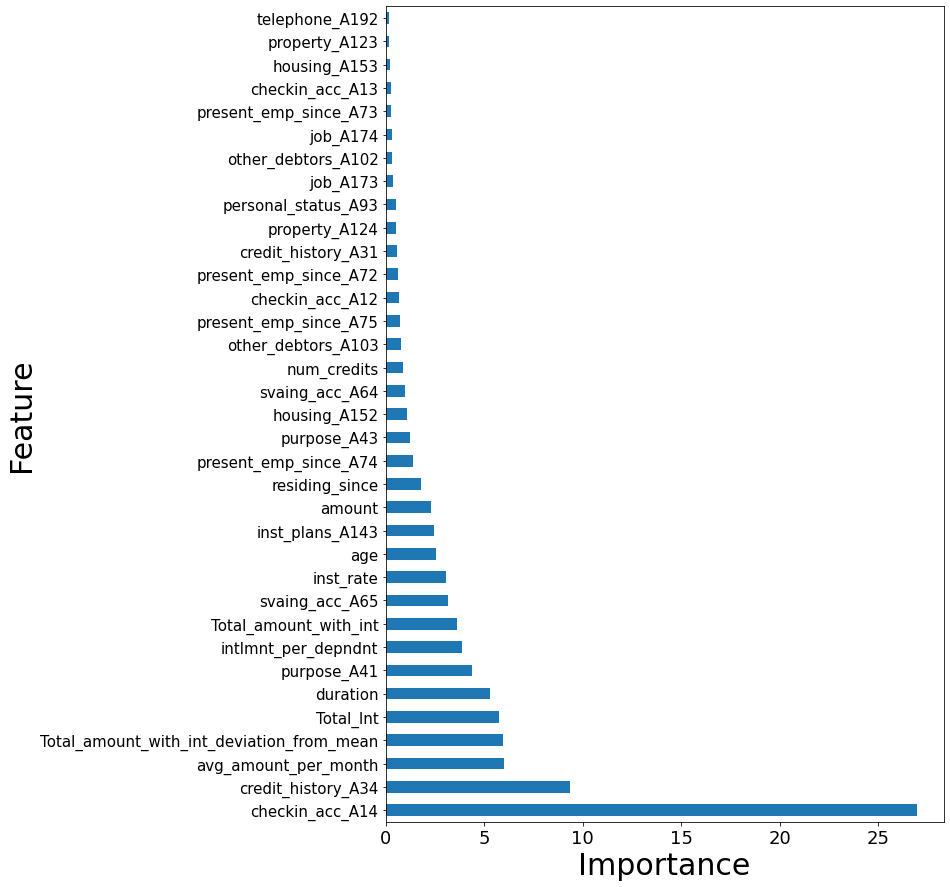

In [69]:
plt.figure(figsize=(10,15))
(pd.Series(catboost_model.get_feature_importance(), index=x_test.columns)
   .nlargest(35)
   .plot(kind='barh')) 


plt.xticks(size=18,rotation=0)
plt.yticks(size=15,rotation=0)
plt.xlabel('Importance',fontsize=30)
plt.ylabel('Feature',fontsize=30)
plt.show()

In [63]:
credit_risk_data.to_excel("new_file.xlsx")

# OBSERVATION
Test accuracy:

    Random Forest:75.5, 
    Logistic Regression:73, 
    Catboost:77